In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

class LogisticRegression:
    def __init__(self, learning_rate=0.001, iterations=2000):
        self.learning_rate = learning_rate
        self.iterations = iterations

    def add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def cost(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

    def fit(self, X, y):
        X = self.add_intercept(X)
        self.theta = np.zeros(X.shape[1])

        for _ in range(self.iterations):
            z = np.dot(X, self.theta)
            h = self.sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.learning_rate * gradient

    def predict_prob(self, X):
        X = self.add_intercept(X)
        return self.sigmoid(np.dot(X, self.theta))

    def predict(self, X, threshold=0.5):
        return self.predict_prob(X) >= threshold

In [5]:
data = pd.read_csv("Breastcancer_data.csv")
X = data.iloc[:,2:32].values
X = np.float64(X)
y = data.iloc[:,1].values
y = np.where(y == 'M', 1, 0)
y.shape

(569,)

In [6]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

In [7]:
model = LogisticRegression()
model.fit(X_train, y_train)
val_predictions = model.predict(X_val)
val_predictions_prob = model.predict_prob(X_val)
print(val_predictions_prob)

C:\Users\dev23\AppData\Local\Temp\ipykernel_65432\1935187655.py:16: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


[1.14082835e-34 5.65067935e-31 8.35279115e-41 1.00000000e+00
 1.70470854e-39 9.86531087e-30 1.00000000e+00 1.00000000e+00
 7.22934316e-20 3.89426053e-34 1.00000000e+00 1.00000000e+00
 2.65753858e-11 1.00000000e+00 2.23996407e-43 1.00000000e+00
 1.86004955e-46 5.97261972e-40 3.86278347e-57 1.00000000e+00
 4.94902578e-21 1.00000000e+00 5.57644775e-40 3.73229810e-55
 1.72089646e-31 9.99753547e-01 9.99987914e-01 1.00000000e+00
 1.00000000e+00 1.00000000e+00 2.04811738e-45 8.60671784e-01
 1.28475131e-23 1.00000000e+00 3.34642565e-20 8.41273258e-30
 1.00000000e+00 5.74248853e-08 1.98085185e-27 4.54883463e-11
 4.33858749e-47 1.00000000e+00 1.00000000e+00 6.16242615e-44
 8.56548530e-37 1.00000000e+00 6.86354806e-16 6.15687616e-35
 1.08204420e-42 9.41811161e-53 1.22237894e-38 2.73917202e-21
 4.19718956e-35 1.00000000e+00 2.41619820e-33 9.26630887e-37
 8.70495820e-36 8.96199760e-07 1.00000000e+00 1.00000000e+00
 1.00473516e-23 1.00000000e+00 1.37524804e-21 3.99469956e-18
 1.13922969e-19 1.000000

In [8]:
accuracy = accuracy_score(y_val, val_predictions)
precision = precision_score(y_val, val_predictions)
recall = recall_score(y_val, val_predictions)
f1 = f1_score(y_val, val_predictions)

print("Validation Set Metrics:")
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))

Validation Set Metrics:
Accuracy: 0.92
Precision: 0.79
Recall: 1.00
F1 Score: 0.88


In [9]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_val,val_predictions)
print(confusion)
print("Class 0 predicted and true : ")
print(confusion[0][0])
print("Class 0 predicted and false : ")
print(confusion[0][1])
print("Class 1 predicted and false : ")
print(confusion[1][0])
print("Class 1 predicted and true : ")
print(confusion[1][1])

[[52  7]
 [ 0 26]]
Class 0 predicted and true : 
52
Class 0 predicted and false : 
7
Class 1 predicted and false : 
0
Class 1 predicted and true : 
26


In [10]:
import random
X_valid = []
Y_valid = []
for i in range (0,20):
    index = random.randint(0,500)
    X_valid.append(X[index])
    Y_valid.append(y[index])
    
Y_valid

[1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0]

In [11]:
df = pd.DataFrame(X_valid)
df.to_csv("Valid_Data.csv")

In [12]:
data = pd.read_csv("Valid_Data.csv")
X = np.float64(X_valid)

In [13]:
val_predictions = model.predict(X)
val_predictions

array([ True,  True,  True, False,  True,  True,  True, False, False,
       False, False, False, False,  True, False, False,  True,  True,
        True, False])

In [14]:
accuracy = accuracy_score(Y_valid, val_predictions)
precision = precision_score(Y_valid, val_predictions)
recall = recall_score(Y_valid, val_predictions)
f1 = f1_score(Y_valid, val_predictions)

print("Validation Set Metrics:")
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))

Validation Set Metrics:
Accuracy: 0.95
Precision: 0.90
Recall: 1.00
F1 Score: 0.95


In [15]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(Y_valid,val_predictions)
print(confusion)
print("Class 0 predicted and true : ")
print(confusion[0][0])
print("Class 0 predicted and false : ")
print(confusion[0][1])
print("Class 1 predicted and false : ")
print(confusion[1][0])
print("Class 1 predicted and true : ")
print(confusion[1][1])

[[10  1]
 [ 0  9]]
Class 0 predicted and true : 
10
Class 0 predicted and false : 
1
Class 1 predicted and false : 
0
Class 1 predicted and true : 
9


In [16]:
import matplotlib.pyplot as plt
acc = []
iterations = 0
for i in range (0,10):
    learning_rate = random.randint(1,9)
    learning_rate = learning_rate/1000
    iterations = 100 + iterations
    model = LogisticRegression(learning_rate=learning_rate,iterations=iterations)
    model.fit(X_train, y_train)
    val_predictions = model.predict(X)
    accuracy = accuracy_score(Y_valid, val_predictions)
    acc.append(accuracy)

C:\Users\dev23\AppData\Local\Temp\ipykernel_65432\1935187655.py:16: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\dev23\AppData\Local\Temp\ipykernel_65432\1935187655.py:16: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\dev23\AppData\Local\Temp\ipykernel_65432\1935187655.py:16: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\dev23\AppData\Local\Temp\ipykernel_65432\1935187655.py:16: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\dev23\AppData\Local\Temp\ipykernel_65432\1935187655.py:16: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\dev23\AppData\Local\Temp\ipykernel_65432\1935187655.py:16: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\dev23\AppData\Local\Temp\ipykernel_65432\1935187655.py:16: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Use

In [17]:
print(acc)

[0.6, 0.85, 0.85, 0.9, 0.95, 0.9, 0.9, 0.9, 0.9, 0.6]


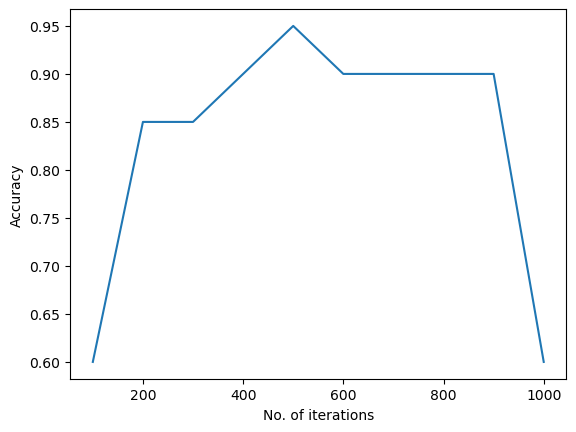

In [18]:
x = [100,200,300,400,500,600,700,800,900,1000]
plt.xlabel("No. of iterations")
plt.ylabel("Accuracy")
plt.plot(x,acc)